In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.multioutput import MultiOutputRegressor, RegressorChain, MultiOutputClassifier, ClassifierChain
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving school_grades_dataset.csv to school_grades_dataset.csv


In [3]:
df = pd.read_csv('school_grades_dataset.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.shape

(649, 33)

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df.studytime.unique()

array([2, 3, 1, 4])

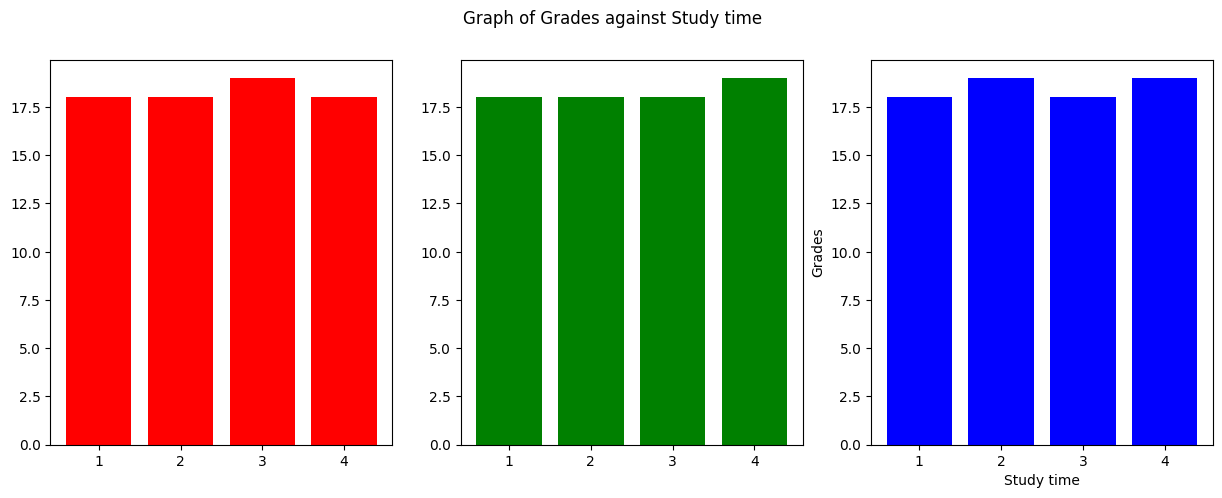

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.bar('studytime', 'G1', color='red', data=df)

plt.subplot(1, 3, 2)
plt.bar('studytime', 'G2', color='green', data=df)

plt.subplot(1, 3, 3)
plt.bar('studytime', 'G3', color='blue', data=df)

plt.suptitle('Graph of Grades against Study time')
plt.xlabel('Study time')
plt.ylabel('Grades')
plt.show()

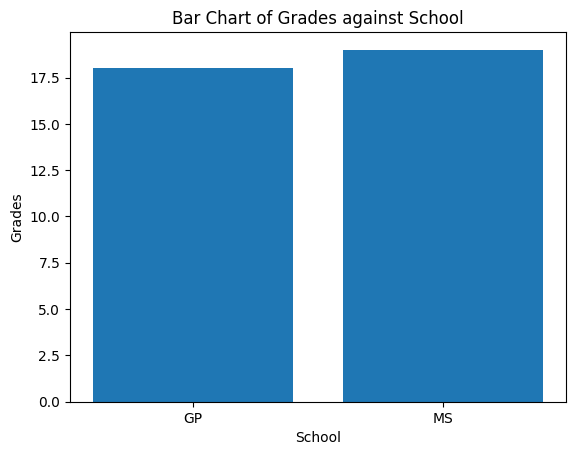

In [10]:
plt.bar('school', 'G1', data=df)
plt.title('Bar Chart of Grades against School')
plt.xlabel('School')
plt.ylabel('Grades')
plt.show()

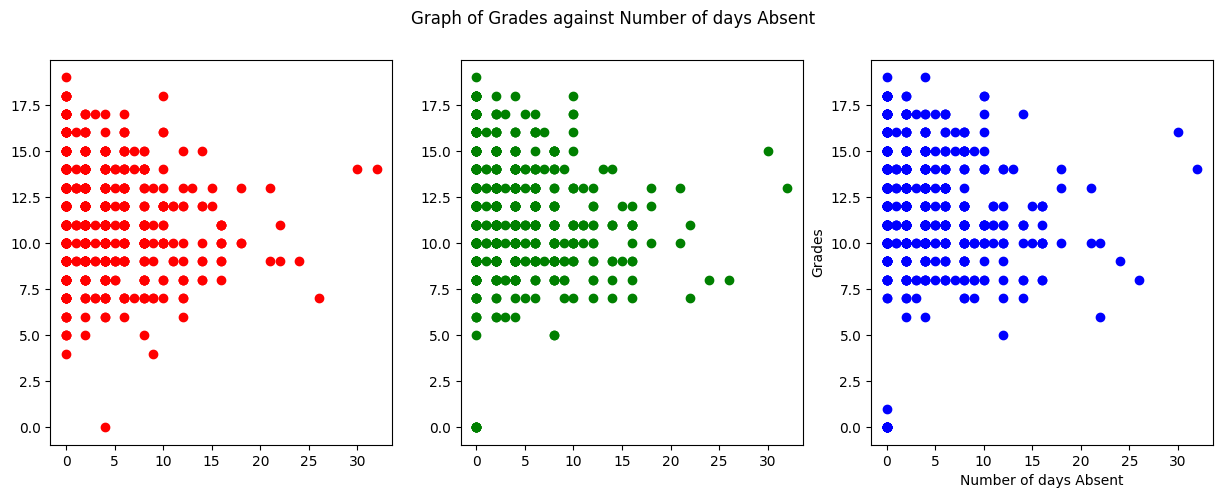

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.scatter('absences', 'G1', c='red', data=df)

plt.subplot(1, 3, 2)
plt.scatter('absences', 'G2', c='green', data=df)

plt.subplot(1, 3, 3)
plt.scatter('absences', 'G3', c='blue', data=df)

plt.suptitle('Graph of Grades against Number of days Absent')
plt.xlabel('Number of days Absent')
plt.ylabel('Grades')
plt.show()

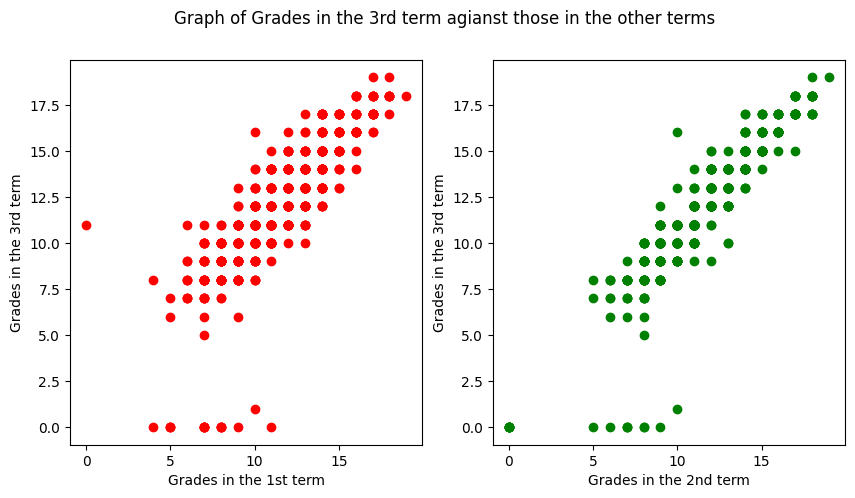

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter('G1', 'G3', c='red', data=df)
plt.xlabel('Grades in the 1st term')
plt.ylabel('Grades in the 3rd term')

plt.subplot(1, 2, 2)
plt.scatter('G2', 'G3', c='green', data=df)
plt.xlabel('Grades in the 2nd term')
plt.ylabel('Grades in the 3rd term')

plt.suptitle('Graph of Grades in the 3rd term agianst those in the other terms')
plt.show()

<ipython-input-13-662b377dffea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


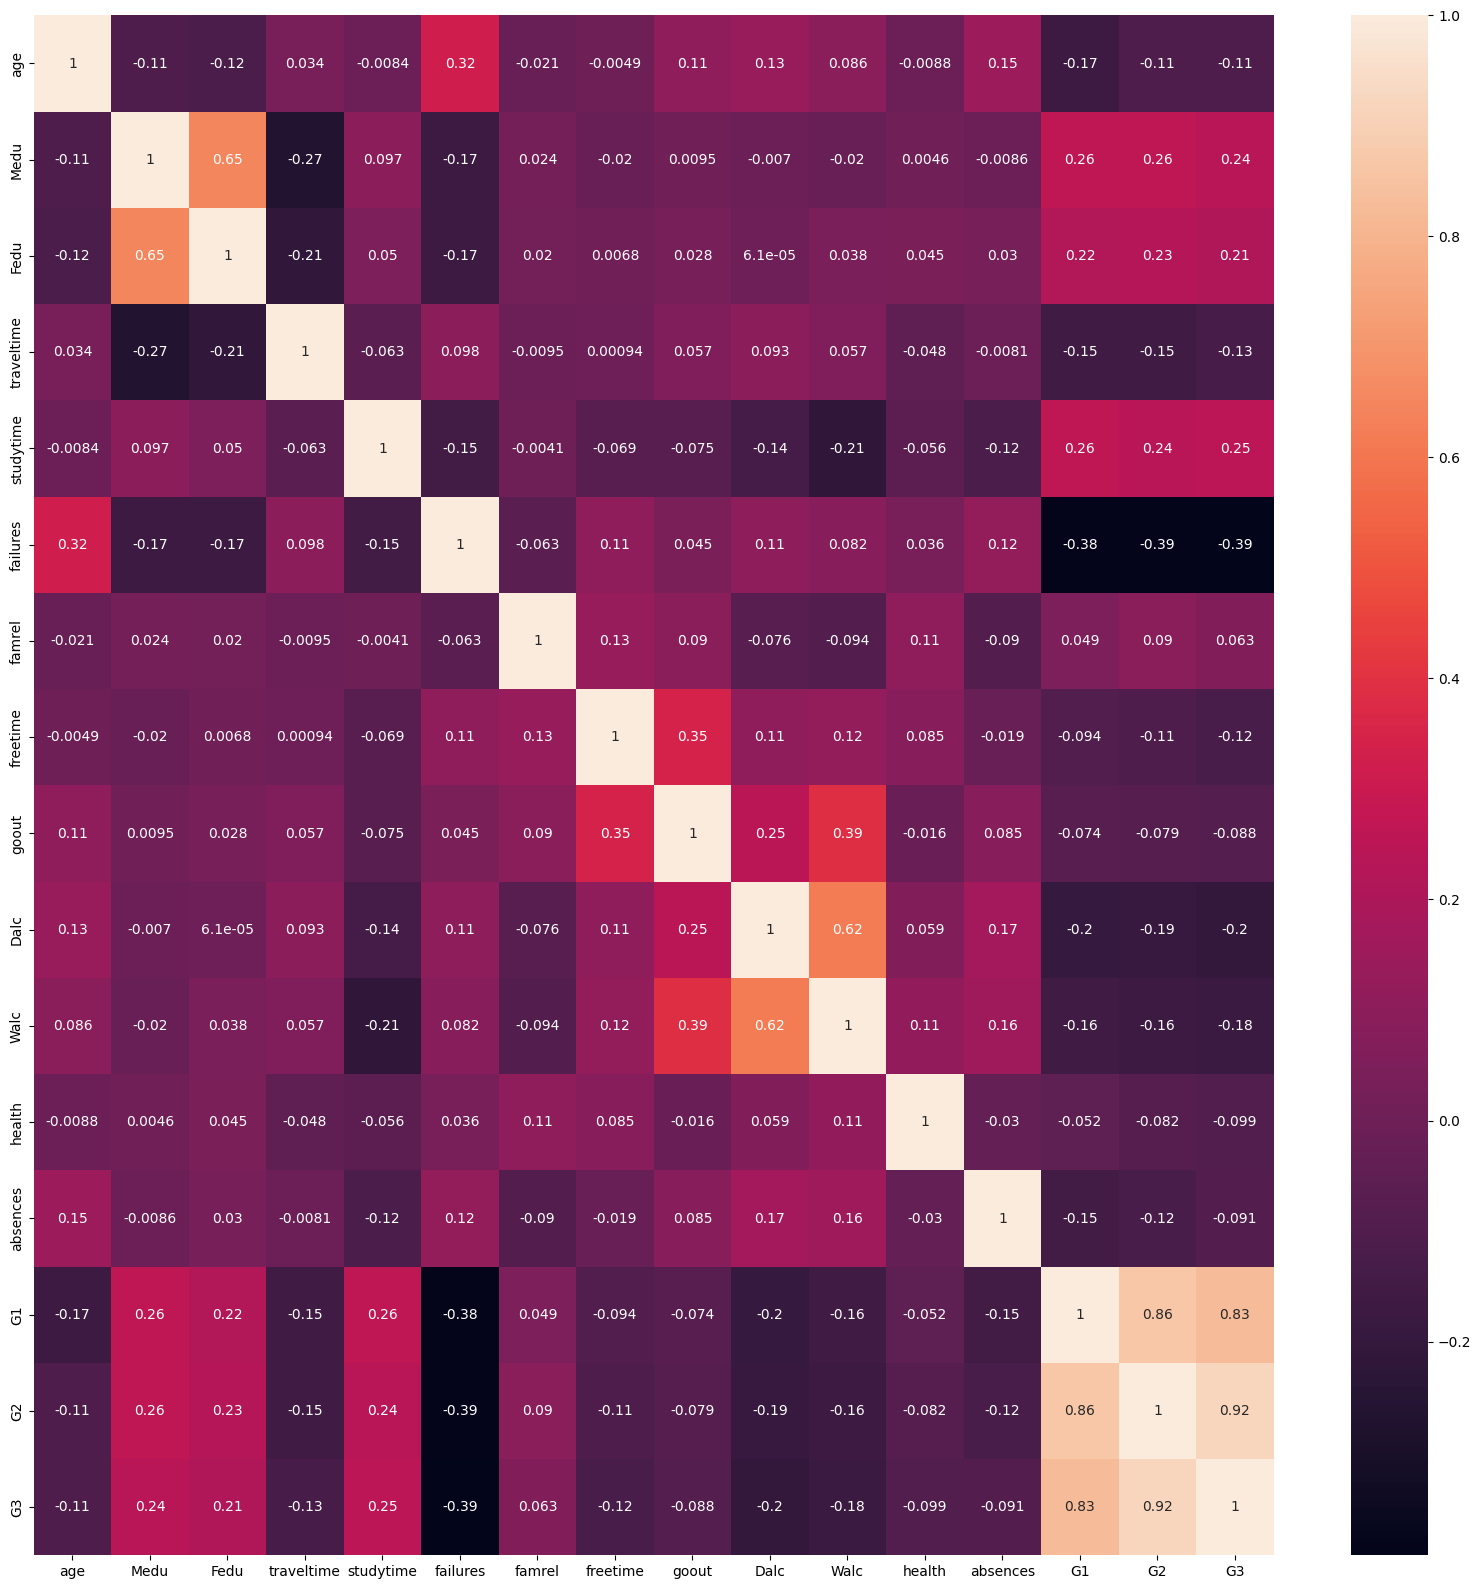

In [13]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True)

In [14]:
le = LabelEncoder()

for col in df.columns:
  if str(df[col].dtype).startswith('int') or str(df[col].dtype).startswith('float'):
    pass
  else:
    df[col] = le.fit_transform(df[col])

df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,6,12,12,13
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,13,12,13
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,2,10,13,13
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,15,16,17
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,12,12,13


In [15]:
df.G1.unique() # 17 elements

array([ 0,  9, 12, 14, 11, 13, 10, 15, 17,  8, 16, 18,  7,  6,  5,  4, 19])

In [16]:
df.G2.unique() # 16 elements

array([11, 13, 14, 12, 16, 17,  8, 10, 15,  9,  7,  6, 18, 19,  0,  5])

In [17]:
df.G3.unique() # 17 elements

array([11, 12, 14, 13, 17, 15,  7, 10, 16,  9,  8, 18,  6,  0,  1,  5, 19])

In [18]:
minm = MinMaxScaler()

names = df.columns
df_scaled = pd.DataFrame(minm.fit_transform(df), columns=names)

df_scaled.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000,0.578947,0.578947
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.473684,0.578947,0.578947
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.631579,0.684211,0.631579
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.736842,0.736842,0.736842
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.578947,0.684211,0.684211
5,0.0,1.0,0.142857,1.0,1.0,1.0,1.00,0.75,0.75,0.50,...,1.00,0.75,0.25,0.00,0.25,1.0,0.1875,0.631579,0.631579,0.684211
6,0.0,1.0,0.142857,1.0,1.0,1.0,0.50,0.50,0.50,0.50,...,0.75,0.75,0.75,0.00,0.00,0.5,0.0000,0.684211,0.631579,0.684211
7,0.0,0.0,0.285714,1.0,0.0,0.0,1.00,1.00,0.50,1.00,...,0.75,0.00,0.75,0.00,0.00,0.0,0.0625,0.526316,0.684211,0.684211
8,0.0,1.0,0.000000,1.0,1.0,0.0,0.75,0.50,0.75,0.50,...,0.75,0.25,0.25,0.00,0.00,0.0,0.0000,0.789474,0.842105,0.894737
9,0.0,1.0,0.000000,1.0,0.0,1.0,0.75,1.00,0.50,0.50,...,1.00,1.00,0.00,0.00,0.00,1.0,0.0000,0.631579,0.631579,0.684211


In [19]:
# the independent variables set
X = df_scaled.drop(['G1', 'G2', 'G3'], axis=1)

# VIF dataframe
vif_info = pd.DataFrame()
vif_info["feature"] = X.columns

# calculating VIF for each feature
vif_info["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_info.head()
# print(vif_info)

,feature,VIF
0,school,1.920650
1,sex,2.309879
2,age,4.044048
3,address,3.905188
4,famsize,1.562291


In [20]:
X = X.drop(['Medu', 'Dalc', 'goout', 'age'], axis=1)

# VIF dataframe
vif_info_aft = pd.DataFrame()
vif_info_aft["feature"] = X.columns

# calculating VIF for each feature
vif_info_aft["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_info_aft.head()

,feature,VIF
0,school,1.886569
1,sex,2.213629
2,address,3.845133
3,famsize,1.557916
4,Pstatus,8.005355


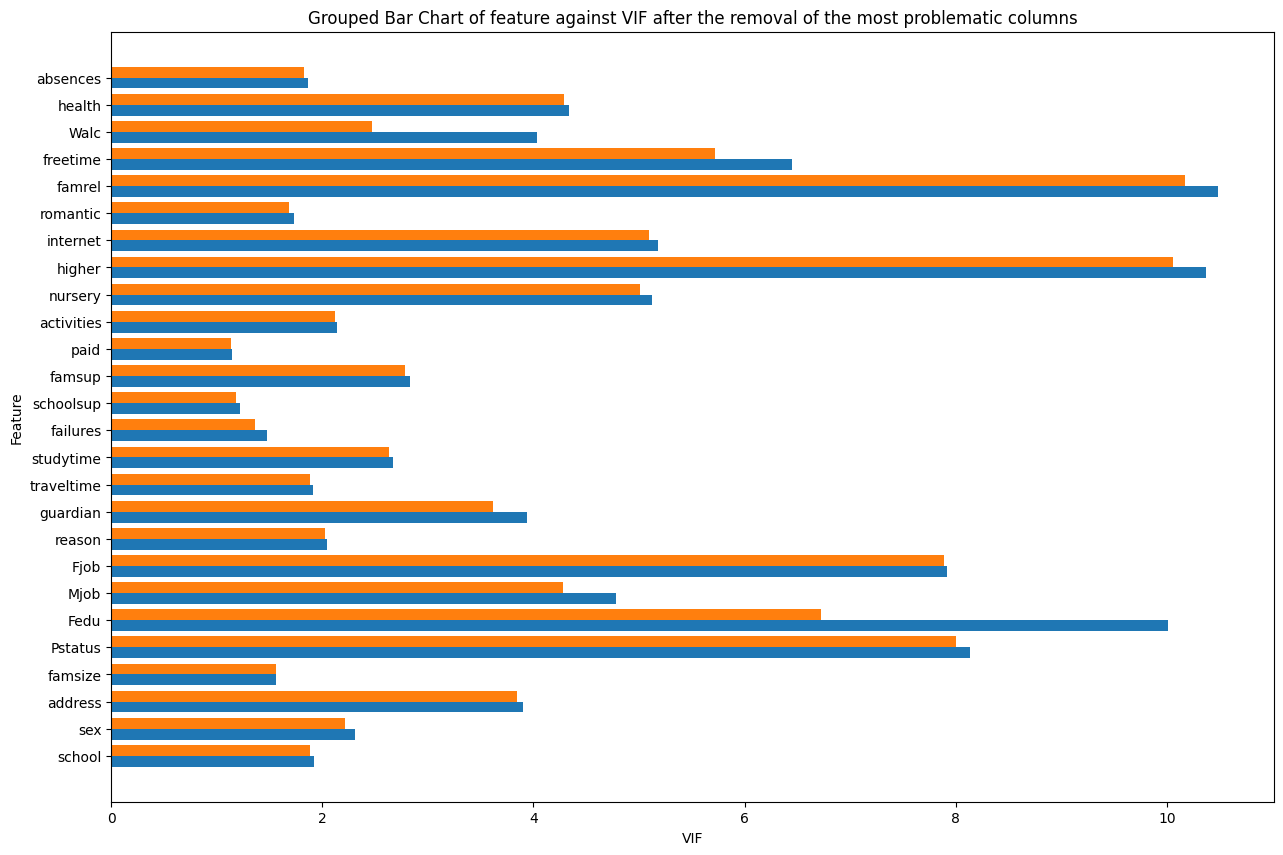

In [21]:
vif_info_bef = vif_info.drop([vif_info.feature[vif_info.feature == 'Medu'].index[0],
                              vif_info.feature[vif_info.feature == 'Dalc'].index[0],
                              vif_info.feature[vif_info.feature == 'goout'].index[0],
                              vif_info.feature[vif_info.feature == 'age'].index[0]], axis=0)

# create data
xpos = np.arange(len(vif_info_bef))
x = vif_info_bef.feature
# print(x)
width = 0.4

# plot data in grouped manner of bar type
plt.figure(figsize=(15,10))
plt.barh(x, vif_info_bef.VIF, height=-0.4, align='edge')
plt.barh(x, vif_info_aft.VIF, height=0.4, align='edge')
plt.title('Grouped Bar Chart of feature against VIF after the removal of the most problematic columns')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.show()

In [22]:
# # the independent variables set
# def filter_by_vif(inputs, vif_info):
#   agrees = True
#   while agrees:
#     # most_vif = max(vif_info.VIF)
#     most_vif_index = vif_info.feature[vif_info.VIF == max(vif_info.VIF)].index
#     # print(inputs.columns[most_vif_index])  'feature' == max(vif_info.VIF)
#     print('~~~ VIF INformation ~~~\n')
#     print(vif_info)
#     print("\nThe column with the highest VIF (%0.001f) is '%s'\n" % (vif_info[most_vif_index], inputs.columns[most_vif_index]))
#     resp = input('Do you consent to its removal from the dataset?(y/n)\n')
#     if 'y' in resp.lower():
#       inputs = inputs.drop(inputs.columns[most_vif_index], axis=1)
#       # VIF dataframe
#       vif_info = pd.DataFrame()
#       vif_info["feature"] = inputs.columns

#       # calculating VIF for each feature
#       vif_info["VIF"] = [variance_inflation_factor(inputs.values, i)
#                                 for i in range(len(inputs.columns))]
#       print(vif_info)
#     else:
#       agrees = False

# # filter_by_vif(X, vif_info)

# **Use function to remove multicollinearity in model**
# **then re-train the models below and train other classification models.**

In [23]:
y = df_scaled[['G1', 'G2', 'G3']]
y

,G1,G2,G3
0,0.000000,0.578947,0.578947
1,0.473684,0.578947,0.578947
2,0.631579,0.684211,0.631579
3,0.736842,0.736842,0.736842
4,0.578947,0.684211,0.684211
...,...,...,...
644,0.526316,0.578947,0.526316
645,0.789474,0.789474,0.842105
646,0.578947,0.631579,0.473684
647,0.526316,0.526316,0.526316


In [24]:
X.head(5)

,school,sex,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,guardian,...,activities,nursery,higher,internet,romantic,famrel,freetime,Walc,health,absences
0,0.0,0.0,1.0,0.0,0.0,1.00,0.00,1.00,0.000000,0.5,...,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.00,0.5,0.1250
1,0.0,0.0,1.0,0.0,1.0,0.25,0.00,0.50,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.00,0.5,0.0625
2,0.0,0.0,1.0,1.0,1.0,0.25,0.00,0.50,0.666667,0.5,...,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.50,0.5,0.1875
3,0.0,0.0,1.0,0.0,1.0,0.50,0.25,0.75,0.333333,0.5,...,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.00,1.0,0.0000
4,0.0,0.0,1.0,0.0,1.0,0.75,0.50,0.50,0.333333,0.0,...,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,1.0,0.0000


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=622)

In [26]:
n_samples, n_features = x_train.shape
n_outputs = y_train.shape[1]
n_classes = 3

print('# of samples : %d \n # of features : %d \n # of outputs : %d \n # of classes : %d \n ' % (n_samples, n_features, n_outputs, n_classes))

# of samples : 519 
 # of features : 26 
 # of outputs : 3 
 # of classes : 3 
 


In [27]:
gbr = GradientBoostingRegressor(random_state=999)
multi_target_gbr = MultiOutputRegressor(gbr, n_jobs=2)
multi_target_gbr.fit(x_train, y_train)
predictions = multi_target_gbr.predict(x_test)

In [28]:
r2_acc = r2_score(y_test, predictions)
mse_acc = mean_squared_error(y_test, predictions)
print(' ~~~ Gradient Boosting Regressor with MOR Model ~~~ \n')
print('R Squared : %.2f \nMSE : %.2f' % (r2_acc, mse_acc))

 ~~~ Gradient Boosting Regressor with MOR Model ~~~ 

R Squared : 0.26 
MSE : 0.02


In [29]:
linear = LinearRegression()
multi_target_linear = MultiOutputRegressor(linear, n_jobs=2)
multi_target_linear.fit(x_train, y_train)
predictions = multi_target_linear.predict(x_test)

In [30]:
r2_acc = r2_score(y_test, predictions)
mse_acc = mean_squared_error(y_test, predictions)
print(' ~~~ Linear Regressor with MOR Model ~~~ \n')
print('R Squared : %.2f \nMSE : %.2f' % (r2_acc, mse_acc))

 ~~~ Linear Regressor with MOR Model ~~~ 

R Squared : 0.30 
MSE : 0.01


In [31]:
gboost = GradientBoostingRegressor(random_state=1999)
multi_target_gboost = RegressorChain(base_estimator=gboost)
multi_target_gboost.fit(x_train, y_train)
predictions = multi_target_gboost.predict(x_test)

In [32]:
r2_acc = r2_score(y_test, predictions)
mse_acc = mean_squared_error(y_test, predictions)
print(' ~~~ Gradient Boosting Regressor with Regressor Chain Model ~~~ \n')
print('R Squared : %.2f \nMSE : %.2f' % (r2_acc, mse_acc))

 ~~~ Gradient Boosting Regressor with Regressor Chain Model ~~~ 

R Squared : 0.29 
MSE : 0.01


In [33]:
lin = LinearRegression()
multi_target_lin = RegressorChain(base_estimator=lin)
multi_target_lin.fit(x_train, y_train)
predictions = multi_target_lin.predict(x_test)

In [34]:
r2_acc = r2_score(y_test, predictions)
mse_acc = mean_squared_error(y_test, predictions)
print(' ~~~ Linear Regressor with Regressor Chain Model ~~~ \n')
print('R Squared : %.2f \nMSE : %.2f' % (r2_acc, mse_acc))

 ~~~ Linear Regressor with Regressor Chain Model ~~~ 

R Squared : 0.30 
MSE : 0.01


# **IMPORTANT:~**
* Use REGRESSOR CHAIN to investigate whether the models' ability to predict the grades of the students will improve if they are allowed to utilise the high correlations between the features G1, G2 & G3
* Then use MULTIOUTPUT CLASSIFICATION and CLASSIFIER CHAIN to investigate whether classifiying the students' grades (as they are discrete values, albiet many) is better than using regression.

In [35]:
y.G1.unique() # 17 elements

array([0.        , 0.47368421, 0.63157895, 0.73684211, 0.57894737,
       0.68421053, 0.52631579, 0.78947368, 0.89473684, 0.42105263,
       0.84210526, 0.94736842, 0.36842105, 0.31578947, 0.26315789,
       0.21052632, 1.        ])

In [36]:
y.G2.unique() # 16 elements

array([0.57894737, 0.68421053, 0.73684211, 0.63157895, 0.84210526,
       0.89473684, 0.42105263, 0.52631579, 0.78947368, 0.47368421,
       0.36842105, 0.31578947, 0.94736842, 1.        , 0.        ,
       0.26315789])

In [37]:
y.G3.unique() # 17 elements

array([0.57894737, 0.63157895, 0.73684211, 0.68421053, 0.89473684,
       0.78947368, 0.36842105, 0.52631579, 0.84210526, 0.47368421,
       0.42105263, 0.94736842, 0.31578947, 0.        , 0.05263158,
       0.26315789, 1.        ])

In [38]:
Xc = df_scaled.drop(['Medu', 'Dalc', 'goout', 'age', 'G1', 'G2', 'G3'], axis=1)
Xc.head()

,school,sex,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,guardian,...,activities,nursery,higher,internet,romantic,famrel,freetime,Walc,health,absences
0,0.0,0.0,1.0,0.0,0.0,1.00,0.00,1.00,0.000000,0.5,...,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.00,0.5,0.1250
1,0.0,0.0,1.0,0.0,1.0,0.25,0.00,0.50,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.00,0.5,0.0625
2,0.0,0.0,1.0,1.0,1.0,0.25,0.00,0.50,0.666667,0.5,...,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.50,0.5,0.1875
3,0.0,0.0,1.0,0.0,1.0,0.50,0.25,0.75,0.333333,0.5,...,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.00,1.0,0.0000
4,0.0,0.0,1.0,0.0,1.0,0.75,0.50,0.50,0.333333,0.0,...,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,1.0,0.0000


In [39]:
Yc = df[['G1', 'G2', 'G3']]

In [40]:
Yc.loc[Yc['G1'] < 10, 'G1'] = 0
Yc.loc[Yc['G1'] >= 10, 'G1'] = 1

<ipython-input-40-c4750544db8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yc.loc[Yc['G1'] < 10, 'G1'] = 0
<ipython-input-40-c4750544db8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yc.loc[Yc['G1'] >= 10, 'G1'] = 1


In [41]:
Yc.loc[Yc['G2'] < 10, 'G2'] = 0
Yc.loc[Yc['G2'] >= 10, 'G2'] = 1

<ipython-input-41-e9564108d7e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yc.loc[Yc['G2'] < 10, 'G2'] = 0
<ipython-input-41-e9564108d7e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yc.loc[Yc['G2'] >= 10, 'G2'] = 1


In [42]:
Yc.loc[Yc['G3'] < 10, 'G3'] = 0
Yc.loc[Yc['G3'] >= 10, 'G3'] = 1

<ipython-input-42-4b57bb0886c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yc.loc[Yc['G3'] < 10, 'G3'] = 0
<ipython-input-42-4b57bb0886c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yc.loc[Yc['G3'] >= 10, 'G3'] = 1


In [43]:
Yc.head()

,G1,G2,G3
0,0,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [44]:
x_train, x_test, y_train, y_test = train_test_split(Xc, Yc, test_size=0.2, random_state=226)

In [45]:
rng_forest = RandomForestClassifier(random_state=2999)
multi_target_rng_forest = MultiOutputClassifier(rng_forest, n_jobs=2)
multi_target_rng_forest.fit(x_train, y_train)
predictions = multi_target_rng_forest.predict(x_test)

In [47]:
acc = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions, average='weighted')
print(' ~~~ Random Forest Classifier with MOC Model ~~~ \n')
print('Accuracy : %.2f \nF1 : %.2f' % (acc, F1))

 ~~~ Random Forest Classifier with MOC Model ~~~ 

Accuracy : 0.70 
F1 : 0.91


In [48]:
log_reg = LogisticRegression()
multi_target_log_reg = MultiOutputClassifier(log_reg, n_jobs=2)
multi_target_log_reg.fit(x_train, y_train)
predictions = multi_target_log_reg.predict(x_test)

In [49]:
acc = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions, average='weighted')
print(' ~~~ Logistic Regression with MOC Model ~~~ \n')
print('Accuracy : %.2f \nF1 : %.2f' % (acc, F1))

 ~~~ Logistic Regression with MOC Model ~~~ 

Accuracy : 0.68 
F1 : 0.89


In [ ]:
# from sklearn.multioutput import MultiOutputRegressor, RegressorChain, MultiOutputClassifier, ClassifierChain

In [50]:
rng_forest = RandomForestClassifier(random_state=2999)
multi_target_rng_forest = ClassifierChain(base_estimator=rng_forest)
multi_target_rng_forest.fit(x_train, y_train)
predictions = multi_target_rng_forest.predict(x_test)

In [51]:
acc = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions, average='weighted')
print(' ~~~ Random Forest Classifier with Classifier Chain Model ~~~ \n')
print('Accuracy : %.2f \nF1 : %.2f' % (acc, F1))

 ~~~ Random Forest Classifier with Classifier Chain Model ~~~ 

Accuracy : 0.72 
F1 : 0.90


In [52]:
log_reg = LogisticRegression()
multi_target_log_reg = ClassifierChain(base_estimator=log_reg)
multi_target_log_reg.fit(x_train, y_train)
predictions = multi_target_log_reg.predict(x_test)

In [53]:
acc = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions, average='weighted')
print(' ~~~ Logistic Regression with Classifier Chain Model ~~~ \n')
print('Accuracy : %.2f \nF1 : %.2f' % (acc, F1))

 ~~~ Logistic Regression with Classifier Chain Model ~~~ 

Accuracy : 0.71 
F1 : 0.90
